# Task 2. Predictive Analytics

# Tasks

1. Using the same transaction dataset, identify the annual salary for each customer

2. Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

3. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

4. How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

5. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72D0-BC6E

 Directory of C:\Users\GIS\Documents\A.Udemy\Python\dataANZ

05/10/2021  05:19 PM    <DIR>          .
05/10/2021  05:19 PM    <DIR>          ..
05/10/2021  08:52 AM    <DIR>          .ipynb_checkpoints
04/10/2021  04:15 PM           450,495 1_DataANZ_Virtual_Internship_Program.ipynb
03/10/2021  12:59 PM           330,622 1_DataANZ_Virtual_Internship_Program-Copy1.ipynb
03/10/2021  03:49 PM           464,612 1_DataANZ_Virtual_Internship_Program-Copy2.ipynb
01/10/2021  03:25 PM         1,782,724 ANZ synthesised transaction dataset.xlsx
01/10/2021  09:46 PM            17,348 DataANZ.docx
04/10/2021  04:15 PM           338,561 Taks_1_DataANZ_Virtual_Internship_Program_Submit.ipynb
05/10/2021  05:13 PM           500,967 Task_2_Predictive Analytics - Copy.ipynb
05/10/2021  05:19 PM           361,392 Task_2_Predictive Analytics.ipynb
               8 File(s)      4,246,721 bytes
               3 Dir(s)  35,329,732,608 bytes 

In [3]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 500

In [4]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# 1. Indeitfy the annual salary for each customer

In [5]:
df['month_name'] = df['date'].dt.month_name()

In [6]:
txn_salary = df[df['txn_description'] == 'PAY/SALARY']
txn_salary = pd.DataFrame(txn_salary.groupby(['txn_description', 'customer_id', 'month_name'])['txn_description'].count()).rename(columns = {'txn_description':'salary_count'}).reset_index()
print(txn_salary.duplicated().sum())
txn_salary.isnull().sum()

0


txn_description    0
customer_id        0
month_name         0
salary_count       0
dtype: int64

In [7]:
txn_salary.head(10)

,txn_description,customer_id,month_name,salary_count
0,PAY/SALARY,CUS-1005756958,August,4
1,PAY/SALARY,CUS-1005756958,October,5
2,PAY/SALARY,CUS-1005756958,September,4
3,PAY/SALARY,CUS-1117979751,August,2
4,PAY/SALARY,CUS-1117979751,October,3
5,PAY/SALARY,CUS-1117979751,September,2
6,PAY/SALARY,CUS-1140341822,August,2
7,PAY/SALARY,CUS-1140341822,October,2
8,PAY/SALARY,CUS-1140341822,September,2
9,PAY/SALARY,CUS-1147642491,August,4


In [8]:
cust_info = df[df['txn_description'] == 'PAY/SALARY']
#  Leave PAY/SALARY and drop the other description values
cust_info = pd.DataFrame(cust_info.groupby(['txn_description', 'customer_id', 'month_name'])['amount'].sum()).reset_index()

# Check if the order of customer_id in both datasets is not the same. 
for i in range(len(cust_info)):
    if cust_info['customer_id'][i] != txn_salary['customer_id'][i]:
        print(f'Customer ID doesn\'t match = {i}')  

In [9]:
cust_info['salary_count'] = txn_salary['salary_count']
cust_info.head(20)

,txn_description,customer_id,month_name,amount,salary_count
0,PAY/SALARY,CUS-1005756958,August,3881.88,4
1,PAY/SALARY,CUS-1005756958,October,4852.35,5
2,PAY/SALARY,CUS-1005756958,September,3881.88,4
3,PAY/SALARY,CUS-1117979751,August,7157.30,2
4,PAY/SALARY,CUS-1117979751,October,10735.95,3
5,PAY/SALARY,CUS-1117979751,September,7157.30,2
6,PAY/SALARY,CUS-1140341822,August,3833.02,2
7,PAY/SALARY,CUS-1140341822,October,3833.02,2
8,PAY/SALARY,CUS-1140341822,September,3833.02,2
9,PAY/SALARY,CUS-1147642491,August,6845.56,4


In [10]:
cust_info['salary_count'].value_counts()

2    136
4     77
5     43
3     24
1     16
Name: salary_count, dtype: int64

No matter how many times they receive salaries in a month, those salaries are their monthly salaries. 

Find the minimum salary in the three months and divide it by 4 (4 weeks) to find the weekly salary. Then, multiply 52 (52 weeks per year) for the annual salary. 

Weekly salary = min salary / 4

Anuual salary = number of weekly salaries * 52

In [11]:
cust_info.head()

,txn_description,customer_id,month_name,amount,salary_count
0,PAY/SALARY,CUS-1005756958,August,3881.88,4
1,PAY/SALARY,CUS-1005756958,October,4852.35,5
2,PAY/SALARY,CUS-1005756958,September,3881.88,4
3,PAY/SALARY,CUS-1117979751,August,7157.30,2
4,PAY/SALARY,CUS-1117979751,October,10735.95,3


In [12]:
uni_cust = cust_info['customer_id'].unique()
weekly_salaries = []
sal_count = []

# Select all the three months' salreis, find the min and save it into min_salary
for cust in range(len(uni_cust)):
    temp_salary = cust_info['amount'][cust_info['customer_id'] == uni_cust[cust]].values.min()
    temp_sal_count = cust_info['salary_count'][cust_info['customer_id'] == uni_cust[cust]].values.sum()
    
    weekly_salaries.append(temp_salary/4)
    sal_count.append(temp_sal_count)
    
# Group by txn_description and customier_id to remove month_name, drop amount and salary_count. 
cust_info = cust_info.groupby(['txn_description', 'customer_id'])['amount'].sum().reset_index().drop(axis = 1, columns = ['amount'])

# Add salary_count, salary_week and salary_year
cust_info['salary_count'] = sal_count
cust_info['salary_week'] = weekly_salaries
cust_info['salary_year'] = cust_info['salary_week'] * 52 

cust_info.head()

,txn_description,customer_id,salary_count,salary_week,salary_year
0,PAY/SALARY,CUS-1005756958,13,970.470,50464.44
1,PAY/SALARY,CUS-1117979751,7,1789.325,93044.90
2,PAY/SALARY,CUS-1140341822,6,958.255,49829.26
3,PAY/SALARY,CUS-1147642491,13,1711.390,88992.28
4,PAY/SALARY,CUS-1196156254,7,1951.865,101496.98


In [13]:
print('')
print('Number of unique customers in df: {} and cust_salary {}' .format(df['customer_id'].nunique(), cust_info['customer_id'].nunique()))
cust_info


Number of unique customers in df: 100 and cust_salary 100


,txn_description,customer_id,salary_count,salary_week,salary_year
0,PAY/SALARY,CUS-1005756958,13,970.4700,50464.44
1,PAY/SALARY,CUS-1117979751,7,1789.3250,93044.90
2,PAY/SALARY,CUS-1140341822,6,958.2550,49829.26
3,PAY/SALARY,CUS-1147642491,13,1711.3900,88992.28
4,PAY/SALARY,CUS-1196156254,7,1951.8650,101496.98
5,PAY/SALARY,CUS-1220154422,7,1141.1800,59341.36
6,PAY/SALARY,CUS-1233833708,12,596.3300,31009.16
7,PAY/SALARY,CUS-1271030853,14,1158.1500,60223.80
8,PAY/SALARY,CUS-127297539,13,1138.7900,59217.08
9,PAY/SALARY,CUS-134193016,7,1011.8400,52615.68


# 2. Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

In [14]:
cust_age = pd.DataFrame(df.groupby(['customer_id', 'age'])['age'].count()).drop(columns = 'age').reset_index()

# Check if the order of customer_id in both datasets is not the same. 
for i in range(len(cust_info)):
    if cust_info['customer_id'][i] != cust_age['customer_id'][i]:
        print(f'Customer ID doesn\'t match = {i}')  

In [15]:
cust_info['age'] = cust_age['age']
cust_info.head()

,txn_description,customer_id,salary_count,salary_week,salary_year,age
0,PAY/SALARY,CUS-1005756958,13,970.470,50464.44,53
1,PAY/SALARY,CUS-1117979751,7,1789.325,93044.90,21
2,PAY/SALARY,CUS-1140341822,6,958.255,49829.26,28
3,PAY/SALARY,CUS-1147642491,13,1711.390,88992.28,34
4,PAY/SALARY,CUS-1196156254,7,1951.865,101496.98,34


              salary_count  salary_week  salary_year       age
salary_count      1.000000    -0.044154    -0.044154  0.182368
salary_week      -0.044154     1.000000     1.000000 -0.063130
salary_year      -0.044154     1.000000     1.000000 -0.063130
age               0.182368    -0.063130    -0.063130  1.000000


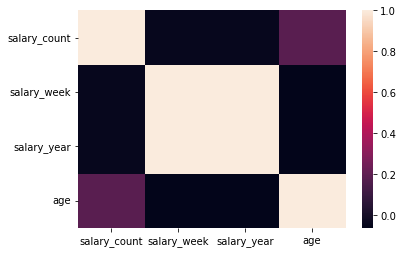

In [16]:
print(cust_info.corr())
sns.heatmap(cust_info.corr())
plt.show()

In [17]:
# Add balance and amount
cust_info['balance'] = df.groupby('customer_id')['balance'].sum().values
cust_info['amount'] = df.groupby('customer_id')['amount'].sum().values

In [18]:
# Extract txn_description subcategories and unstack them.
cust_txn = pd.DataFrame(df.groupby(['customer_id', 'txn_description'])['txn_description'].count()).unstack().fillna(0).reset_index()

# Check if the order of customer_id in both datasets is not the same. 
for i in range(len(cust_info)):
    if cust_info['customer_id'][i] != cust_txn['customer_id'][i]:
        print(f'Customer ID doesn\'t match = {i}')  

In [19]:
cust_txn.head()

customer_id txn_description                                \
txn_description                      INTER BANK PAY/SALARY PAYMENT PHONE BANK   
0                CUS-1005756958             0.0       13.0     9.0        3.0   
1                CUS-1117979751             1.0        7.0    40.0        0.0   
2                CUS-1140341822             3.0        6.0     6.0        0.0   
3                CUS-1147642491             2.0       13.0    27.0        0.0   
4                CUS-1196156254             5.0        7.0    70.0        0.0   

                                 
txn_description   POS SALES-POS  
0                26.0      22.0  
1                26.0      26.0  
2                39.0      26.0  
3                38.0      38.0  
4                74.0      89.0

In [20]:
cust_txn.columns # cust_txn['txn_description', 'INTER BANK'].head()

MultiIndex([(    'customer_id',           ''),
            ('txn_description', 'INTER BANK'),
            ('txn_description', 'PAY/SALARY'),
            ('txn_description',    'PAYMENT'),
            ('txn_description', 'PHONE BANK'),
            ('txn_description',        'POS'),
            ('txn_description',  'SALES-POS')],
           names=[None, 'txn_description'])

In [21]:
# Drop the txn_description column and add the subcategories
cust_info = cust_info.drop(axis = 1, columns = 'txn_description')

cust_info['txn_pos'] = cust_txn['txn_description', 'POS']
cust_info['txn_salespos'] = cust_txn['txn_description', 'SALES-POS']
cust_info['txn_payment'] = cust_txn['txn_description', 'PAYMENT']
cust_info['txn_salary'] = cust_txn['txn_description', 'PAY/SALARY']
cust_info['txn_interbank'] = cust_txn['txn_description', 'INTER BANK']
cust_info['txn_phonebank'] = cust_txn['txn_description', 'PHONE BANK']

In [22]:
# cust_salary['customer_no'] = cust_salary['customer_id'].astype('category').cat.codes
# cust_salary.reset_index().rename({'index': 'customer_no'})
cust_info.head()

,customer_id,salary_count,salary_week,salary_year,age,balance,amount,txn_pos,txn_salespos,txn_payment,txn_salary,txn_interbank,txn_phonebank
0,CUS-1005756958,13,970.470,50464.44,53,166137.20,16268.97,26.0,22.0,9.0,13.0,0.0,3.0
1,CUS-1117979751,7,1789.325,93044.90,21,982992.90,33984.37,26.0,26.0,40.0,7.0,1.0,0.0
2,CUS-1140341822,6,958.255,49829.26,28,455936.98,17010.60,39.0,26.0,6.0,6.0,3.0,0.0
3,CUS-1147642491,13,1711.390,88992.28,34,1065875.26,28980.82,38.0,38.0,27.0,13.0,2.0,0.0
4,CUS-1196156254,7,1951.865,101496.98,34,5456746.27,36050.72,74.0,89.0,70.0,7.0,5.0,0.0


               salary_count  salary_week  salary_year       age   balance  \
salary_count       1.000000    -0.044154    -0.044154  0.182368 -0.153083   
salary_week       -0.044154     1.000000     1.000000 -0.063130  0.288825   
salary_year       -0.044154     1.000000     1.000000 -0.063130  0.288825   
age                0.182368    -0.063130    -0.063130  1.000000  0.132941   
balance           -0.153083     0.288825     0.288825  0.132941  1.000000   
amount             0.078996     0.911797     0.911797 -0.058265  0.285201   
txn_pos            0.142596    -0.068584    -0.068584 -0.157512 -0.028073   
txn_salespos       0.146722    -0.058520    -0.058520 -0.165381 -0.024020   
txn_payment       -0.001522     0.405392     0.405392 -0.070249  0.182004   
txn_salary         1.000000    -0.044154    -0.044154  0.182368 -0.153083   
txn_interbank     -0.082167     0.396109     0.396109 -0.054395  0.193177   
txn_phonebank     -0.041208     0.193922     0.193922  0.023672  0.284393   

<AxesSubplot:>

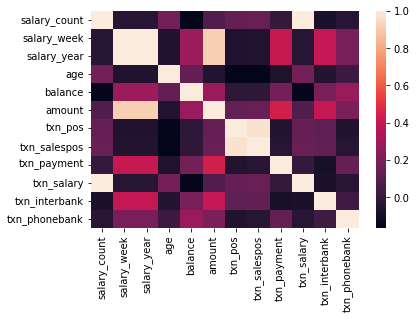

In [23]:
# Check the correlation again
cust_corr = cust_info.corr()
print(cust_corr)
sns.heatmap(cust_corr)

In [24]:
# cust_corr.unstack()
cust_corr_pairs = cust_corr.unstack().sort_values()
pd.DataFrame(cust_corr_pairs[(cust_corr_pairs>0.3) & (cust_corr_pairs<1)]).reset_index()

,level_0,level_1,0
0,txn_interbank,salary_week,0.396109
1,salary_week,txn_interbank,0.396109
2,txn_interbank,salary_year,0.396109
3,salary_year,txn_interbank,0.396109
4,amount,txn_interbank,0.398977
5,txn_interbank,amount,0.398977
6,salary_week,txn_payment,0.405392
7,txn_payment,salary_week,0.405392
8,txn_payment,salary_year,0.405392
9,salary_year,txn_payment,0.405392


    3	txn_interbank	salary_year	0.396109
    4	txn_interbank	amount	0.398977

    6	txn_payment	salary_year	0.405392
    10	txn_payment	amount	0.435576

    14	amount	salary_year	0.911797

    16	txn_pos	txn_salespos	0.970999

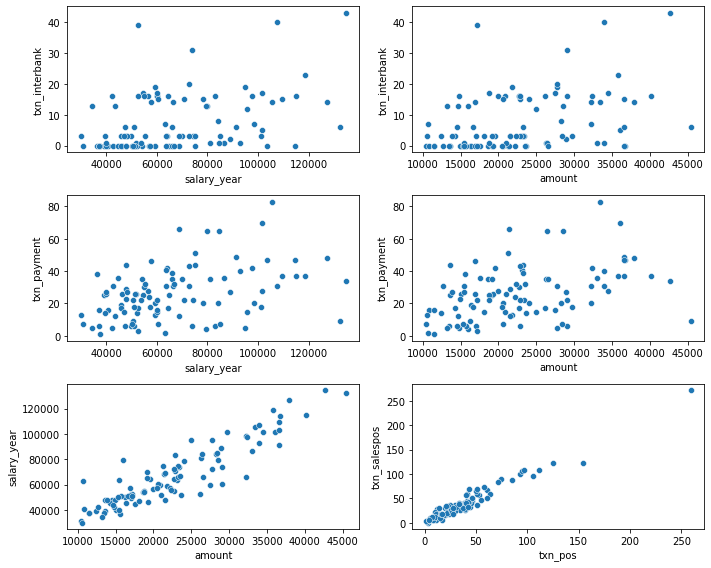

In [25]:
salary_yearfig, ax = plt.subplots(3, 2, figsize = (10, 8))
plt_data = cust_info
ax[0,0] = sns.scatterplot(data = plt_data, x = 'salary_year', y = 'txn_interbank', ax = ax[0,0])
ax[0,1] = sns.scatterplot(data = plt_data, x = 'amount', y = 'txn_interbank', ax = ax[0,1])
ax[1,0] = sns.scatterplot(data = plt_data, x = 'salary_year', y = 'txn_payment', ax = ax[1,0])
ax[1,1] = sns.scatterplot(data = plt_data, x = 'amount', y = 'txn_payment', ax = ax[1,1])
ax[2,0] = sns.scatterplot(data = plt_data, x = 'amount', y = 'salary_year', ax = ax[2,0])
ax[2,1] = sns.scatterplot(data = plt_data, x = 'txn_pos', y = 'txn_salespos', ax = ax[2,1])
plt.tight_layout()
plt.show()

# 3. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

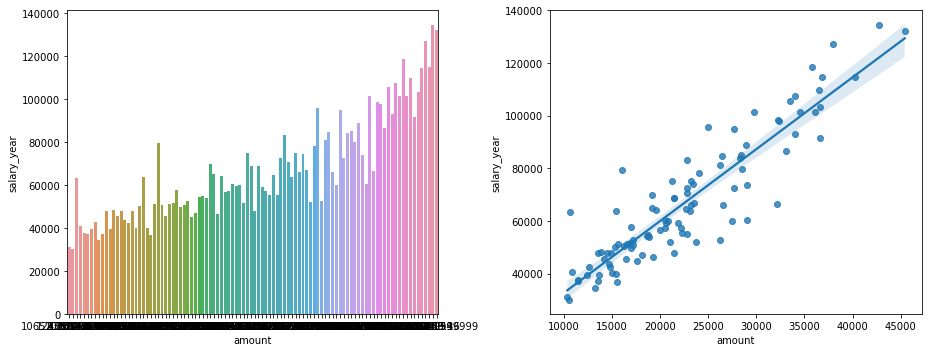

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sns.regplot(data = plt_data, x = 'amount', y = 'salary_year', ax = ax[1])
sns.barplot(data = plt_data, x = 'amount', y = 'salary_year', ax = ax[0])

plt.tight_layout()
plt.show()

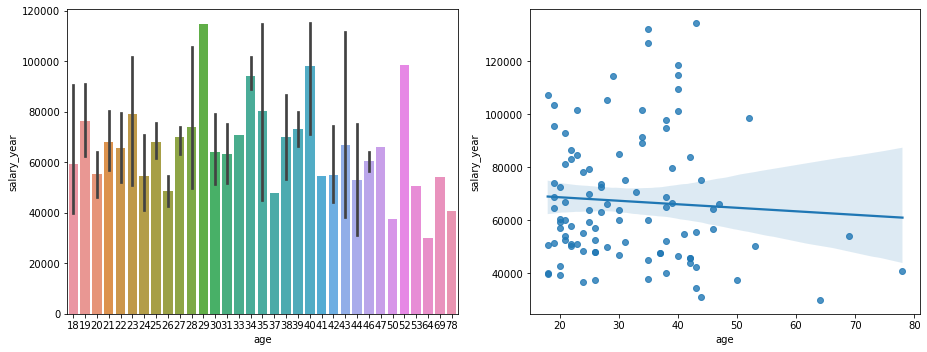

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))

sns.regplot(data = plt_data, x = 'age', y = 'salary_year', ax = ax[1])
sns.barplot(data = plt_data, x = 'age', y = 'salary_year', ax = ax[0])

plt.tight_layout()
plt.show()

Linear regression

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Divide the data into attributes and labels
X = cust_info['age'].values.reshape(-1,1)
y = cust_info['salary_year'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
regressor = LinearRegression()
# Fit the model
regressor.fit(X_train, y_train)

print(regressor.score(X,y))
print(regressor.intercept_)
print(regressor.coef_)


0.0035327219103066243
[70540.27717267]
[[-97.3446013]]


In [63]:
# Predict
y_pred = regressor.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)) # ????

16845.276803782217
408346724.05295813


In [64]:
rg_df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
rg_df

,Actual,Predicted
0,79849.64,66743.837722
1,51508.60,68690.729748
2,49829.26,67814.628336
3,47707.40,66938.526925
4,45703.06,66451.803918
5,85109.44,67619.939134
6,65000.00,66841.182323
7,107437.98,68788.074349
8,60327.80,68593.385147
9,37716.64,67133.216127


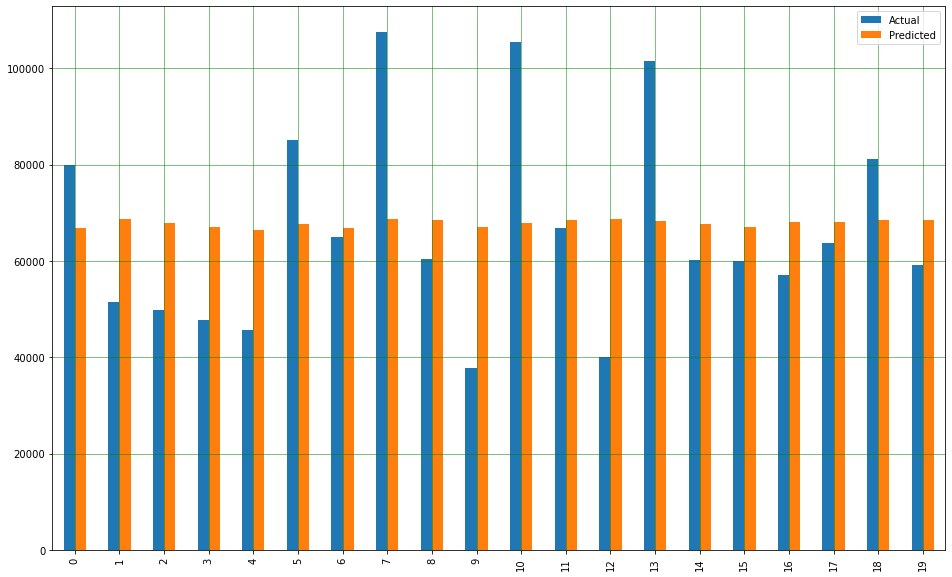

In [65]:
rg_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

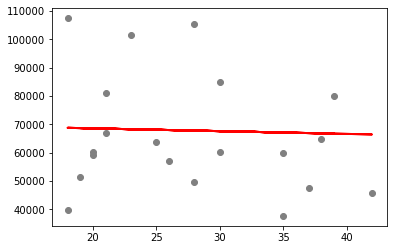

In [66]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# 4. How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

Although the score is high (0.83%), its MAE and RMSE are 16845.276803782217 and 408346724.05295813, which means that the model is inaccurate. It is, therefore, highly recommended not to use this linear regression model to segment customers into income brackets for reporting purposes. It happened due to insufficient amount of data and/or problems in the model development.

# 5. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

The decision tree model also gave the high numbers in MAE and RMSE (16498.24339583332 and 401157661.9711822) and it performed a bit better than the linear regression model. Setting different max_depth and gathering more data would be helpful to produce better results.  

In [102]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth= 2)

# Train the model
tree.fit(X, y)

# Predict 
tree_pred = tree.predict(X_test)

print(tree.score(X,y))
print(mean_absolute_error(y_test, tree_pred))
print(mean_squared_error(y_test, tree_pred)) # ????

0.1319156473695492
16498.24339583332
401157661.9711822


In [89]:
tree_df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : tree_pred.flatten()})
tree_df

,Actual,Predicted
0,79849.64,69601.37275
1,51508.60,69601.37275
2,49829.26,69601.37275
3,47707.40,69601.37275
4,45703.06,57256.45900
5,85109.44,69601.37275
6,65000.00,69601.37275
7,107437.98,69601.37275
8,60327.80,69601.37275
9,37716.64,69601.37275


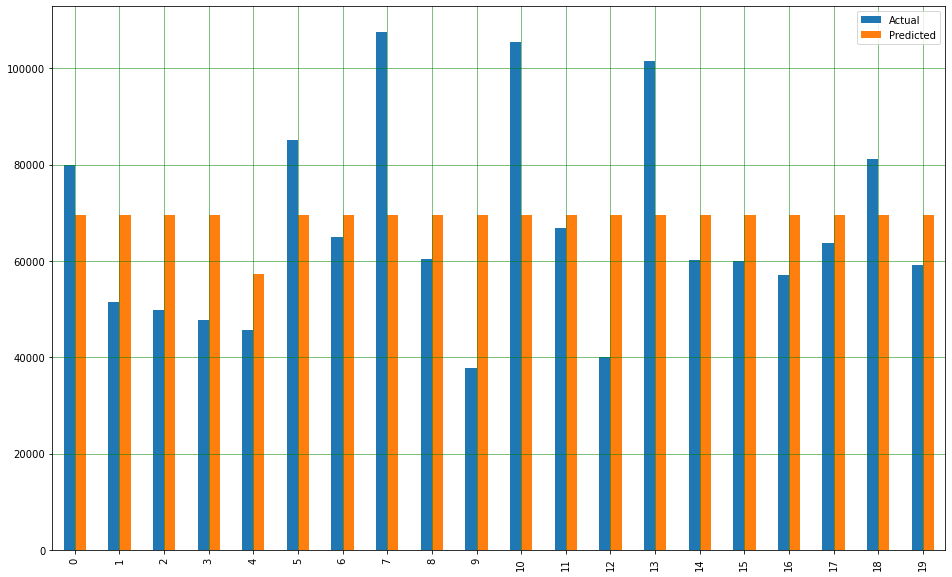

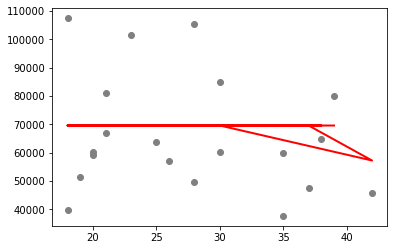

In [90]:
tree_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, tree_pred, color='red', linewidth=2)
plt.show()